In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("Greece_listings.xlsx", sheet_name="Listings")
data.head(10)

,location_name,res_sqr,construction_year,bedrooms,res_price
0,Παλαιό Φάληρο-Αττική,55,1973,1.0,89000
1,Αχαρνές-Αττική,98,2010,2.0,150000
2,Παγκράτι-Αττική,126,1990,3.0,400000
3,Αθήνα-Αττική,85,1957,2.0,80000
4,Ίλιον-Αττική,48,1996,1.0,100000
5,Αθήνα-Αττική,96,1964,2.0,133000
6,Γαλάτσι-Αττική,67,1970,2.0,35000
7,Λαγκάδας-Θεσσαλονίκη,280,2012,5.0,89000
8,Αθήνα-Αττική,75,1972,2.0,130000
9,Δάφνη-Αττική,338,2002,3.0,450000


In [3]:
x = data.iloc[:, 1:-2].values
y = data.iloc[:,-1:].values
x

array([[  55, 1973],
       [  98, 2010],
       [ 126, 1990],
       ...,
       [ 213, 1985],
       [ 125, 2022],
       [  41, 2004]], dtype=int64)

In [4]:
y

array([[ 89000],
       [150000],
       [400000],
       ...,
       [200000],
       [355000],
       [120000]], dtype=int64)

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(x[:, 0:1])
x[:, 0:1] = imputer.transform(x[:, 0:1])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [7]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)
x_norm = (x_train - mu) / sigma
x_train = x_norm
x_train
    

array([[-0.22239398, -0.65777499],
       [-0.3547437 , -1.42776774],
       [ 0.01492275,  1.42573482],
       ...,
       [-0.44601937, -1.06541821],
       [-0.24064912, -1.02012452],
       [-0.22239398,  0.88221052]])

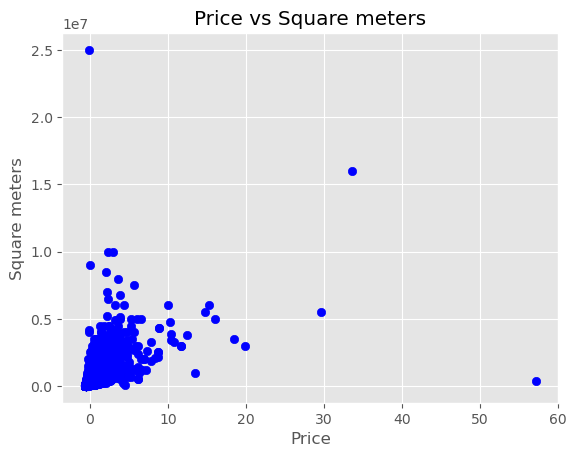

In [8]:
plt.style.use("ggplot")
plt.scatter(y=y_train, x=x_train[:, 0:1], marker="o", c="b")
plt.title("Price vs Square meters")
plt.xlabel("Price")
plt.ylabel("Square meters")
plt.show()

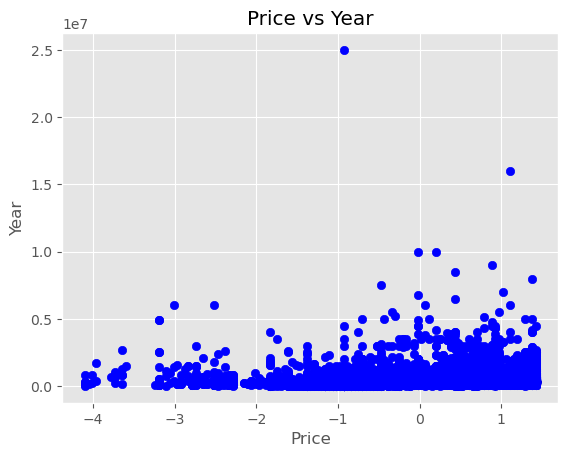

In [9]:
plt.scatter(y=y_train, x=x_train[:, 1:], marker="o", c="b")
plt.title("Price vs Year")
plt.xlabel("Price")
plt.ylabel("Year")
plt.show()